In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



def funcDF_info(df, columns=None):

    print(f'DF.info :\n{df.info()}\n\n')
    print(f'DF.describe :\n{df.describe()}\n\n')
    print(f'DF 결측치 파악 :\n{df.isnull().sum()}\n\n')

def funcDF_heatmap1(df):
    sns.heatmap(df)

def funcDF_heatmap2(df):
    sns.heatmap(df.corr())

def funcDF_pairplot(df):
    sns.pairplot(df)

def funcDF_boxplot(df, columns=None):
    # 이상치 박스플롯
    if columns is None:
        columns = df.columns
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))
    for i, column in enumerate(columns):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(column)
    plt.tight_layout()
    plt.show()
    if columns is None:
        columns = df.columns
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = np.nan
        print(f'{column}컬럼] Q1 : {Q1:.3f}, Q3 : {Q3:.3f}, IQR : {IQR:.3f}, 사분위범위 : {lower_bound:.3f} ~ {upper_bound:.3f}')


def funcDF_histogram(df):
    num_columns = df.shape[1]
    num_rows = int(num_columns ** 0.5)
    num_cols = (num_columns // num_rows) + (1 if num_columns % num_rows != 0 else 0)
    

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10,6))
    for i, column in enumerate(df.columns):
        row = i // num_cols
        col = i % num_cols
        sns.histplot(df[column], ax=axes[row, col], kde=True)
        axes[row, col].set_title(column)

    for i in range(num_columns, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()

def funcDF_visualize(df, columns=None):
    funcDF_histogram(df)
    funcDF_heatmap1(df)
    funcDF_heatmap2(df)
    funcDF_pairplot(df)
    funcDF_boxplot(df, columns=None)

def funcDF_logAPPLY(df, columns=None):
    if columns is None:
        columns = df.columns
    for column in columns:
        df[column] = np.log1p(df[column])
    print('Log apply')
    return df





df = pd.DataFrame([[1,2,3,4],[1,2,3,4],[10,20,30,40]])

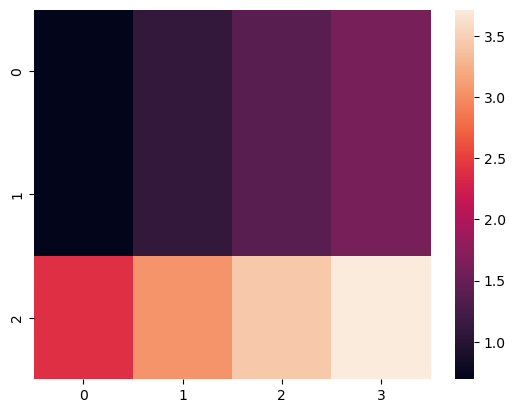

In [151]:
funcDF_heatmap1(df)

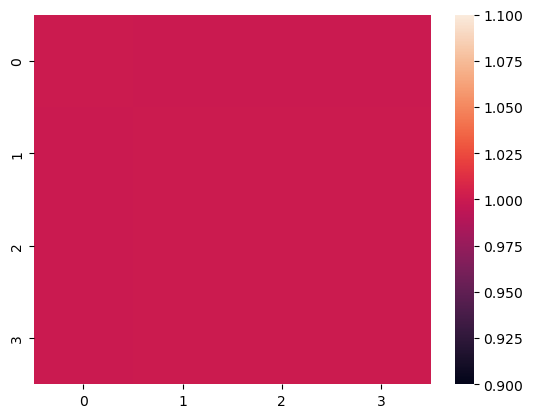

In [152]:
funcDF_heatmap2(df)

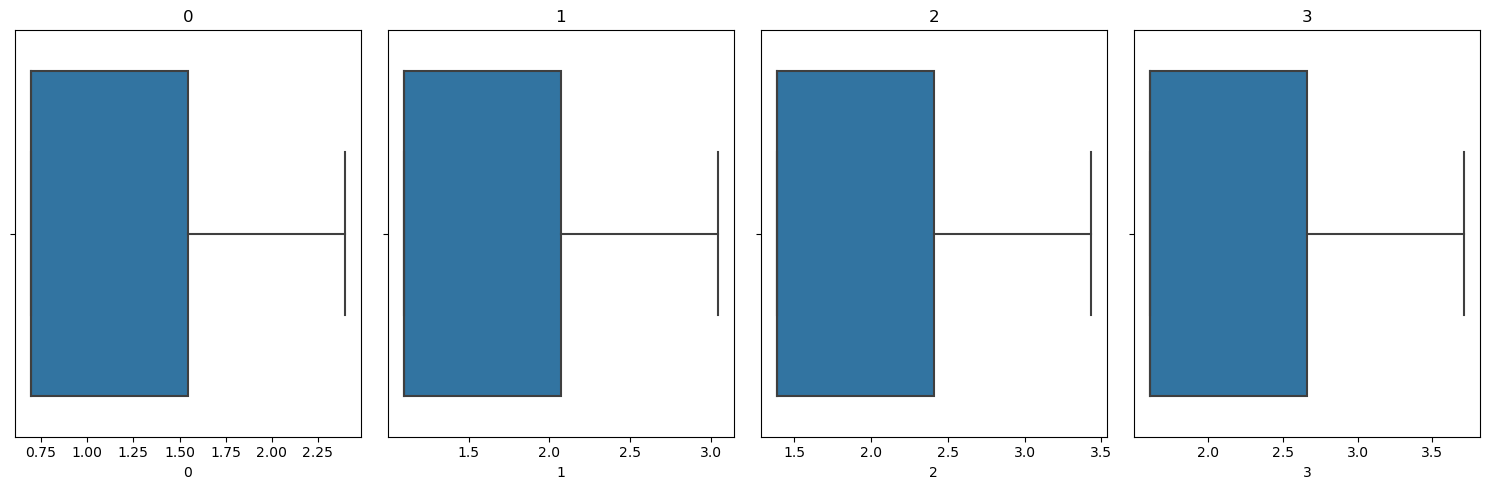

0컬럼] Q1 : 0.693, Q3 : 1.546, IQR : 0.852, 사분위범위 : -0.585 ~ 2.824
1컬럼] Q1 : 1.099, Q3 : 2.072, IQR : 0.973, 사분위범위 : -0.361 ~ 3.531
2컬럼] Q1 : 1.386, Q3 : 2.410, IQR : 1.024, 사분위범위 : -0.149 ~ 3.946
3컬럼] Q1 : 1.609, Q3 : 2.662, IQR : 1.052, 사분위범위 : 0.031 ~ 4.240


In [153]:
funcDF_boxplot(df)

/Users/sml/anaconda3/envs/Torch_NLP38/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


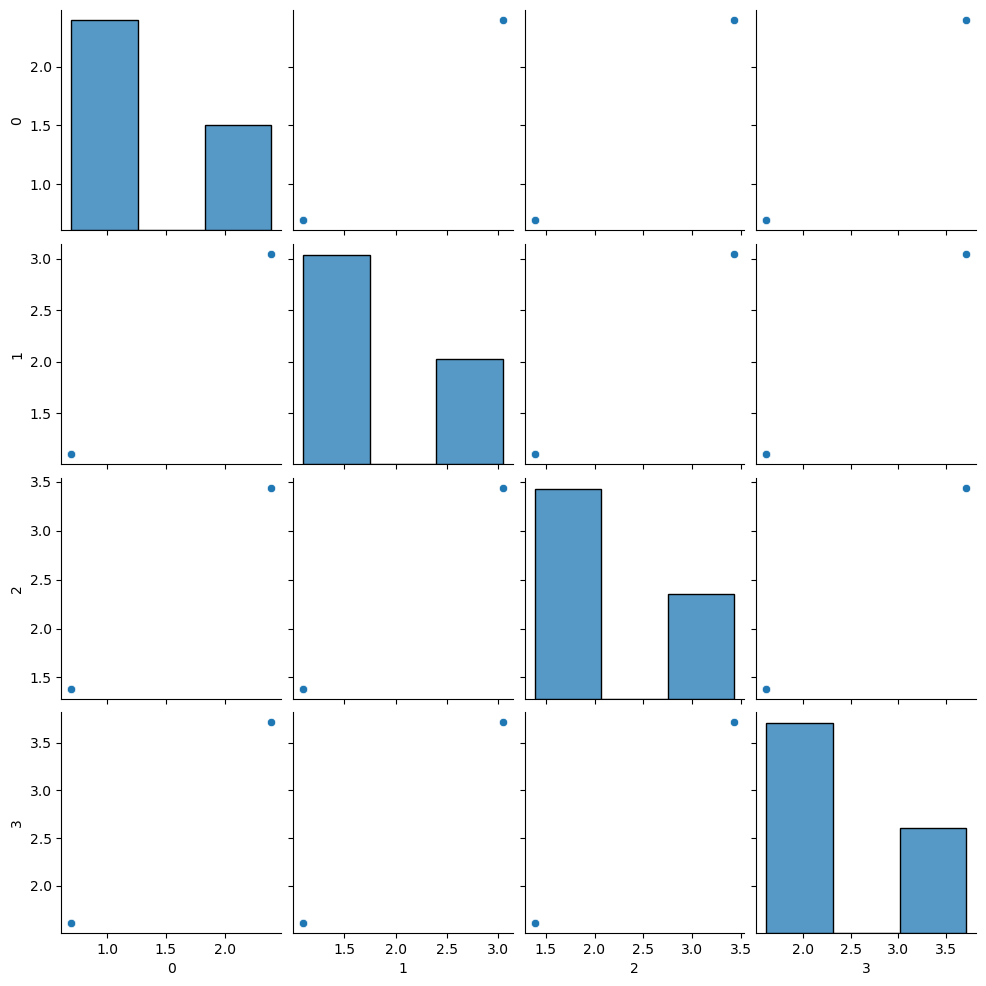

In [154]:
funcDF_pairplot(df)

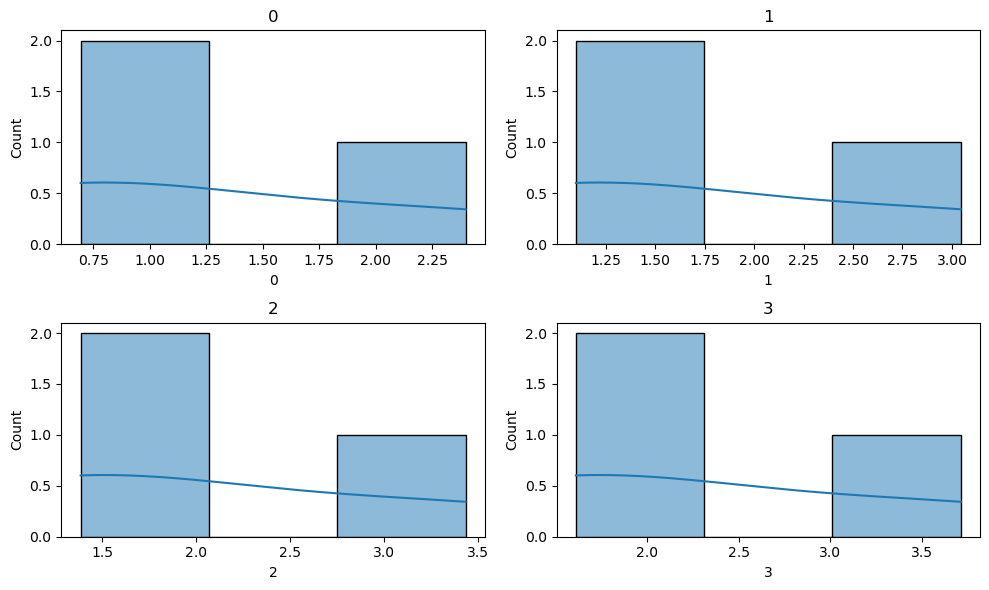

/Users/sml/anaconda3/envs/Torch_NLP38/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


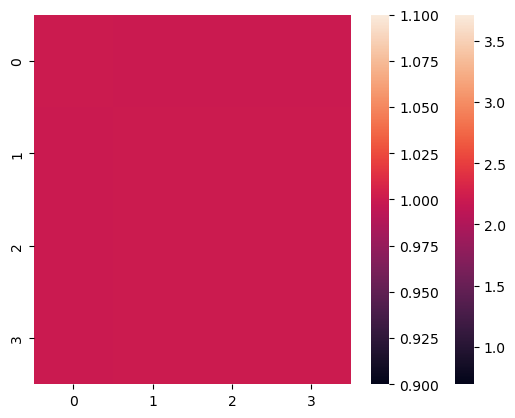

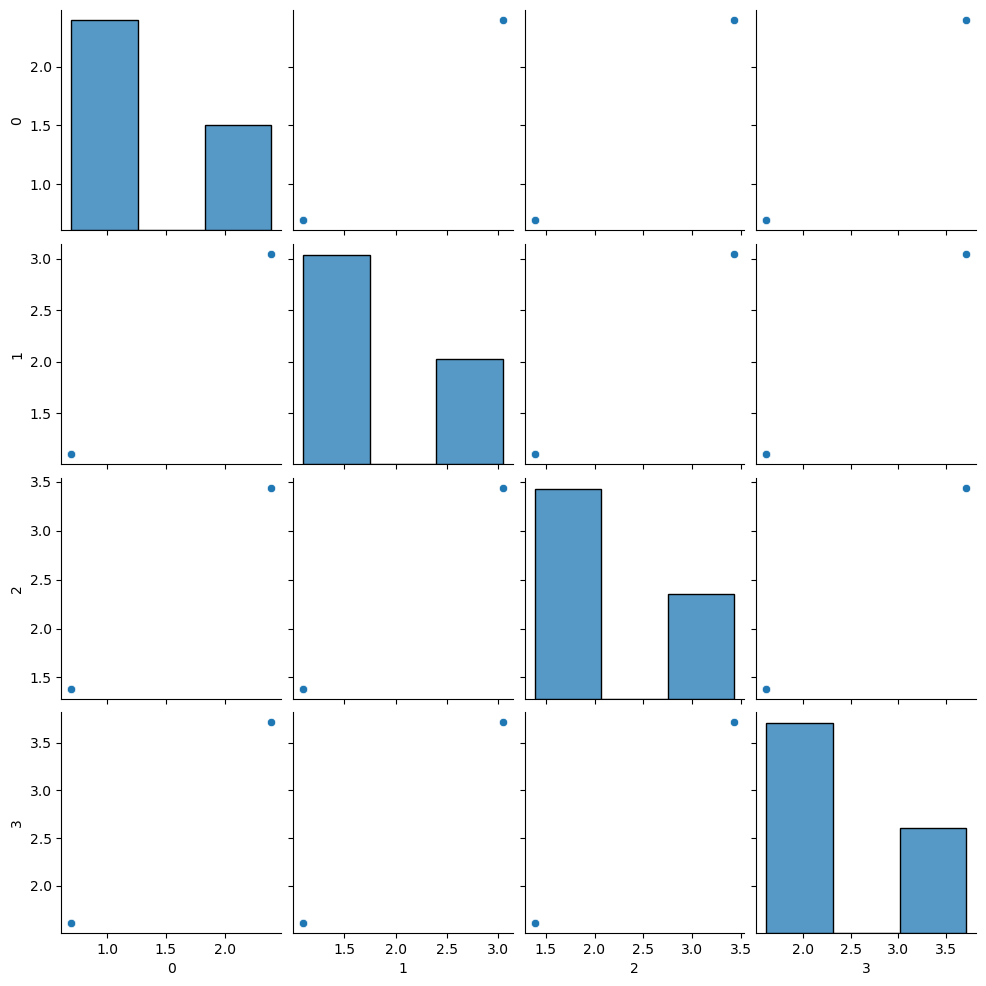

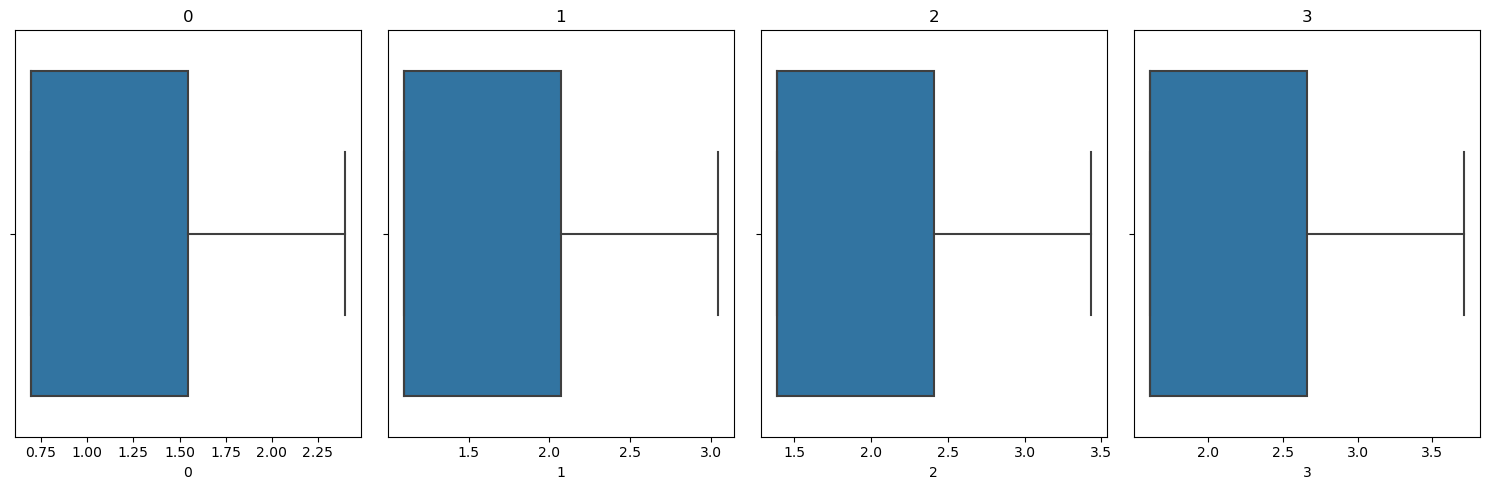

0컬럼] Q1 : 0.693, Q3 : 1.546, IQR : 0.852, 사분위범위 : -0.585 ~ 2.824
1컬럼] Q1 : 1.099, Q3 : 2.072, IQR : 0.973, 사분위범위 : -0.361 ~ 3.531
2컬럼] Q1 : 1.386, Q3 : 2.410, IQR : 1.024, 사분위범위 : -0.149 ~ 3.946
3컬럼] Q1 : 1.609, Q3 : 2.662, IQR : 1.052, 사분위범위 : 0.031 ~ 4.240


In [155]:
funcDF_visualize(df)